In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import time
import illustris_python_mod as il_mod

import sys
import os
sys.path.append('../BH_dynamics_analysis')
sys.path.append('/home/pranavsatheesh/arepo_package/')
import arepo_package as arepo

In [2]:
# import illustris_python_mod as il
# print(il.__file__)

In [3]:
basePath = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'

In [81]:
arepo.get_cosmology(basePath)[2]

0.6771

In [4]:
N_snaps = 32
snaps = np.arange(0,N_snaps+1,1)

In [82]:
merger_properties=np.load(basePath + 'merger_statistics_subhalo_remnants.npy',allow_pickle=True)[0]

In [6]:
true_merger_flag  = np.array(merger_properties['merger_type'])==1

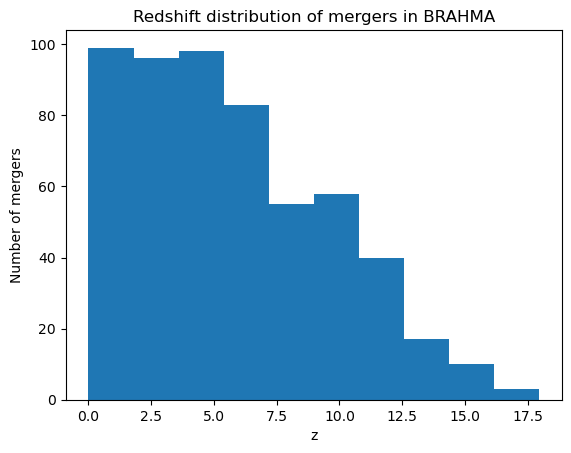

In [7]:
merger_z = np.array(merger_properties['remnant_redshift'])[true_merger_flag]
plt.hist(merger_z, bins=10)
plt.xlabel("z")
plt.ylabel("Number of mergers")
plt.title("Redshift distribution of mergers in BRAHMA")
plt.show()

In [8]:
print(merger_properties.keys())

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])


In [9]:
true_merger_flag  = np.array(merger_properties['merger_type'])==1
brahma_merger_data = {}

for key in merger_properties.keys():
    brahma_merger_data[key] = np.array(merger_properties[key])[true_merger_flag]

In [10]:
N_mergers = np.sum(true_merger_flag)
print("The number of BH mergers in this run is %d"%(N_mergers))

The number of BH mergers in this run is 559


In [11]:
brahma_merger_data.keys()

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])

In [12]:
snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)

In [21]:
snap_numbers = []

for remnant_redshift in brahma_merger_data['remnant_redshift']:

    idx = np.where(z_list == remnant_redshift)[0]
    snap_numbers.append(snap_list[idx[0]])

In [32]:
snap_numbers

[15,
 15,
 21,
 20,
 32,
 22,
 25,
 15,
 23,
 23,
 20,
 24,
 18,
 18,
 17,
 20,
 18,
 20,
 15,
 18,
 19,
 25,
 21,
 16,
 27,
 26,
 21,
 20,
 21,
 21,
 20,
 12,
 23,
 16,
 20,
 27,
 22,
 18,
 14,
 16,
 16,
 30,
 17,
 20,
 23,
 22,
 21,
 30,
 21,
 15,
 23,
 14,
 22,
 23,
 23,
 20,
 16,
 21,
 21,
 14,
 24,
 25,
 19,
 17,
 18,
 20,
 13,
 22,
 24,
 17,
 24,
 14,
 17,
 17,
 20,
 21,
 17,
 19,
 14,
 18,
 32,
 19,
 16,
 14,
 18,
 16,
 15,
 17,
 25,
 24,
 21,
 24,
 15,
 23,
 21,
 20,
 24,
 17,
 18,
 23,
 23,
 14,
 14,
 19,
 19,
 18,
 21,
 28,
 11,
 15,
 22,
 19,
 25,
 30,
 24,
 22,
 15,
 17,
 13,
 23,
 24,
 26,
 17,
 21,
 15,
 30,
 23,
 25,
 28,
 14,
 13,
 18,
 19,
 17,
 23,
 23,
 23,
 23,
 21,
 22,
 19,
 20,
 18,
 32,
 18,
 20,
 19,
 23,
 16,
 16,
 21,
 7,
 23,
 21,
 22,
 17,
 14,
 23,
 19,
 28,
 32,
 15,
 21,
 23,
 22,
 27,
 19,
 19,
 13,
 17,
 17,
 18,
 24,
 26,
 23,
 7,
 16,
 17,
 23,
 16,
 20,
 24,
 19,
 16,
 17,
 31,
 32,
 20,
 25,
 27,
 17,
 32,
 12,
 23,
 19,
 21,
 21,
 15,
 21,
 21,
 1

In [26]:
z_list

array([2.50484387e+01, 2.39609608e+01, 2.30324872e+01, 2.20291718e+01,
       2.09634266e+01, 2.00464910e+01, 1.89776156e+01, 1.79630246e+01,
       1.69999610e+01, 1.60050415e+01, 1.49891732e+01, 1.40339921e+01,
       1.30025453e+01, 1.19802133e+01, 1.09756433e+01, 9.99659047e+00,
       9.00233985e+00, 8.01217295e+00, 7.00541705e+00, 6.01075740e+00,
       4.99593347e+00, 4.00794511e+00, 3.00813107e+00, 2.00202814e+00,
       1.49551217e+00, 9.97294226e-01, 7.00106354e-01, 5.03047523e-01,
       3.99926965e-01, 2.97717685e-01, 1.97284182e-01, 9.94018026e-02,
       2.22044605e-16])

In [51]:
for i in range(N_mergers):
    snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)
    snapnum = snap_list[np.where(z_list==brahma_merger_data['remnant_redshift'][i])[0][0]]

    print("remnant_redshift:",brahma_merger_data['remnant_redshift'][i],"SubhaloID:",brahma_merger_data['remnant_SubhaloID'][i],"snapshot:",snapnum)


remnant_redshift: 9.996590466186332 SubhaloID: 121 snapshot: 15
remnant_redshift: 9.996590466186332 SubhaloID: 85 snapshot: 15
remnant_redshift: 4.0079451114652676 SubhaloID: 775 snapshot: 21
remnant_redshift: 4.995933468164624 SubhaloID: 847 snapshot: 20
remnant_redshift: 2.220446049250313e-16 SubhaloID: 7670 snapshot: 32
remnant_redshift: 3.008131071630377 SubhaloID: 3514 snapshot: 22
remnant_redshift: 0.9972942257819404 SubhaloID: 0 snapshot: 25
remnant_redshift: 9.996590466186332 SubhaloID: 721 snapshot: 15
remnant_redshift: 2.0020281392528516 SubhaloID: 322 snapshot: 23
remnant_redshift: 2.0020281392528516 SubhaloID: 1880 snapshot: 23
remnant_redshift: 4.995933468164624 SubhaloID: 456 snapshot: 20
remnant_redshift: 1.4955121664955557 SubhaloID: 2761 snapshot: 24
remnant_redshift: 7.005417045544533 SubhaloID: 713 snapshot: 18
remnant_redshift: 7.005417045544533 SubhaloID: 472 snapshot: 18
remnant_redshift: 8.012172948865935 SubhaloID: 258 snapshot: 17
remnant_redshift: 4.9959334681

In [52]:
true_merger_flag  = np.array(merger_properties['merger_type'])==1
merger_z = np.array(merger_properties['remnant_redshift'])[true_merger_flag]


post_merger_subhaloid = np.array(merger_properties['remnant_SubhaloID'])[true_merger_flag]

index=0

snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)
snapnum = snap_list[np.where(z_list==merger_z[index])[0][0]]

print("remnant_redshift:",merger_z[index],"SubhaloID:",post_merger_subhaloid[index],"snapshot:",snapnum)

remnant_subhalo_stellarmass = np.array(merger_properties['remnant_SubhaloStellarMass'])[true_merger_flag]
remnant_subhalo_darkmattermass = np.array(merger_properties['remnant_SubhaloDarkMatterMass'])[true_merger_flag]


fields = ['SubhaloMassType']

#subhalomasstype,o_redshift = arepo.get_subhalo_property(basePath,fields,merger_z[index],file_format='fof_sub_subfind')
subhalomasstype,o_redshift = arepo.get_subhalo_property(basePath,fields,merger_z[index],postprocessed=1)
h=0.67
print("Subhalomassbytype:",subhalomasstype[post_merger_subhaloid[index]]*10**10/h)
print("stellar_mass_from_file",remnant_subhalo_stellarmass[index]*10**10/h)
print("DM_mass_from_file",remnant_subhalo_darkmattermass[index]*10**10/h)


remnant_redshift: 9.996590466186332 SubhaloID: 121 snapshot: 15
Subhalomassbytype: [3.18922770e+08 4.12167231e+09 0.00000000e+00 0.00000000e+00
 4.40996312e+06 8.87190091e+05]
stellar_mass_from_file 4409963.122582925
DM_mass_from_file 4121672306.487809


In [27]:
fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR','SubhaloGasMetallicity','SubhaloStarMetallicity','SubhaloPos','SubhaloHalfmassRadType']

In [60]:
subhalos,o_redshift = arepo.get_subhalo_property(basePath,fields,brahma_merger_data['remnant_redshift'][0],postprocessed=1)

In [52]:
merger_indices = np.where(brahma_merger_data['remnant_redshift']==brahma_merger_data['remnant_redshift'][0])

subhalo_ids_merging = brahma_merger_data['remnant_SubhaloID'][merger_indices]

In [ ]:
subhalo_ids = np.arange(len(subhalos['SubhaloLenType'][:,0]))
valid_subhalo_ids = subhalo_ids

In [ ]:
subhalo_ids_non_merging = np.setdiff1d(valid_subhalo_ids, subhalo_ids_merging)

array([    0,     1,     2, ..., 49207, 49208, 49209])

In [75]:
h=0.67
subhalos['SubhaloMassType'][subhalo_ids_merging[0]]*10**10/h

array([3.18922770e+08, 4.12167231e+09, 0.00000000e+00, 0.00000000e+00,
       4.40996312e+06, 8.87190091e+05])

In [11]:
SubhaloMassType,o=arepo.get_subhalo_property(basePath,'SubhaloMassType',merger_z[index],postprocessed=1)

In [79]:
np.load(basePath+'bhdata_with_subhalos/snapshot_%s.npy'%(snapnum),allow_pickle=True)

array([array([1.00050291e+11, 1.00052653e+11, 1.00004273e+11, 1.00003751e+11,
              1.00001909e+11, 1.00134223e+11, 1.00099576e+11, 1.00100628e+11,
              1.00134253e+11, 1.00007938e+11, 1.00134218e+11, 1.00036233e+11,
              1.00021189e+11, 1.00030999e+11, 1.00134220e+11, 1.00031785e+11,
              1.00032563e+11, 1.00129836e+11, 1.00129831e+11, 1.00069669e+11,
              1.00070455e+11, 1.00067836e+11, 1.00129264e+11, 1.00127958e+11,
              1.00130895e+11, 1.00061016e+11, 1.00062066e+11, 1.00040848e+11,
              1.00134294e+11, 1.00134239e+11, 1.00001116e+11, 1.00019864e+11,
              1.00018555e+11, 1.00020391e+11, 1.00128277e+11, 1.00130109e+11,
              1.00026526e+11, 1.00023382e+11, 1.00023901e+11, 1.00085555e+11,
              1.00132959e+11, 1.00000572e+11, 1.00011871e+11, 1.00006755e+11,
              1.00009376e+11, 1.00007020e+11, 1.00009598e+11, 1.00010909e+11,
              1.00009337e+11, 1.00021016e+11, 1.00110210e+11, 1.

#### Header data

In [26]:
snap_num = 0
h = il_mod.groupcat.loadHeader(basePath, snap_num)['HubbleParam']
Box_l = il_mod.groupcat.loadHeader(basePath,snap_num)['BoxSize']/1000/h
redshifts  =np.array([il_mod.groupcat.loadHeader(basePath, snap)['Redshift'] for snap in snaps])
print("Max redshift: %d"%(redshifts[0]))
print("Box length : %1.3f Mpc"%(Box_l))

Max redshift: 25
Box length : 18.461 Mpc


In [56]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloMassType']
snapNum=15
subhalos = il.groupcat.loadSubhalos(basePath,snapNum,fields=fields)
print(subhalos['count'])
print("Subhalo masses:",np.log10(subhalos['SubhaloMass']*10**10/h))
# Get the "index-based IDs" for subhalos (0 to N-1)
subhalo_indices = np.arange(len(subhalos['SubhaloMass']))
print(f"Subhalo indices: {subhalo_indices}")

47525
Subhalo masses: [10.03982357  8.61622094  8.31304592 ...  7.55276321  7.51828201
  7.49206536]
Subhalo indices: [    0     1     2 ... 47522 47523 47524]


In [74]:
subhalos['SubhaloMassType'][85][4]

3.553144e-05

### BH mergers to subhalo data

In [27]:
snap_list, z_list=arepo.get_snapshot_redshift_correspondence(basePath)

In [29]:
z_list

array([2.50484387e+01, 2.39609608e+01, 2.30324872e+01, 2.20291718e+01,
       2.09634266e+01, 2.00464910e+01, 1.89776156e+01, 1.79630246e+01,
       1.69999610e+01, 1.60050415e+01, 1.49891732e+01, 1.40339921e+01,
       1.30025453e+01, 1.19802133e+01, 1.09756433e+01, 9.99659047e+00,
       9.00233985e+00, 8.01217295e+00, 7.00541705e+00, 6.01075740e+00,
       4.99593347e+00, 4.00794511e+00, 3.00813107e+00, 2.00202814e+00,
       1.49551217e+00, 9.97294226e-01, 7.00106354e-01, 5.03047523e-01,
       3.99926965e-01, 2.97717685e-01, 1.97284182e-01, 9.94018026e-02,
       2.22044605e-16])

In [28]:
details=h5py.File(basePath+'blackhole_details.hdf5')
details.keys()

<KeysViewHDF5 ['BH_ID', 'BH_Mass', 'BH_Mdot', 'Rho', 'ScaleFactor', 'cs']>

In [25]:
details.get('BH_Mass')[:]

array([1.00005e-05, 1.00000e-05, 1.00001e-05, ..., 2.83128e-05,
       1.55527e-05, 9.95773e-04])

In [ ]:
full_data=np.loadtxt(basePath+'blackhole_details/'+output_file_name,dtype='str')

In [ ]:
np.shape(full_data)

(37833, 6)

In [5]:
basePath = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/output'

In [1]:
import illustris_python_mod as il

In [2]:
basePath = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/'

['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloID', 'SubhaloIDRaw', 'TreeID']

## Halo Data

In [64]:
snapNum=0
halo_data = il.groupcat.loadHalos(basePath, snapNum, fields=['GroupFirstSub', 'GroupNsubs'])
group_first_sub = halo_data['GroupFirstSub']  # Index of first subhalo in subhalo catalog
group_nsubs = halo_data['GroupNsubs']         # Number of subhalos in halo

#print(group_first_sub)
#print(group_nsubs)

subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=['SubhaloMass', 'SubhaloGrNr'])

# Get the "index-based IDs" for subhalos (0 to N-1)
subhalo_indices = np.arange(len(subhalos['SubhaloMass']))
#print(f"Subhalo indices: {subhalo_indices}")

for i in group_first_sub:
    if group_first_sub[i] >= 0:
        start = group_first_sub[i]
        end = start + group_nsubs[i]
        subhalos_in_halo = subhalo_indices[start:end]
        print(f"Subhalo indices for halo {i}: {subhalos_in_halo}")
    else:
        print(f"Halo {i} has no subhalos.")

Subhalo indices for halo 0: [0]
Subhalo indices for halo 1: [1]


In [68]:
snapNum=5
GroupFirstSub = il.groupcat.loadHalos(basePath,snapNum,fields=['GroupFirstSub'])
print(GroupFirstSub)

[  0   2   4   6   7   8   9  10  11  12  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171  -1 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199  -1
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
  -1 218 219 220 221 222 223 224 225]


In [92]:
redshifts[15]

9.996590466186332

254718 160000051800000012 160000051800000002
postprocessing/tree_extended.16.hdf5
/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/postprocessing/tree_extended.16.hdf5
postprocessing/tree_extended.16.hdf5
/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/postprocessing/tree_extended.16.hdf5
['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloID', 'SubhaloIDRaw', 'TreeID']
[30 29 28 27 26 25 24 23 22]
254328 160000048800000012 160000048800000002
postprocessing/tree_extended.16.hdf5
/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/postprocessing/tre

Text(0.5, 1.0, 'Progenitor branch walk of subhalos')

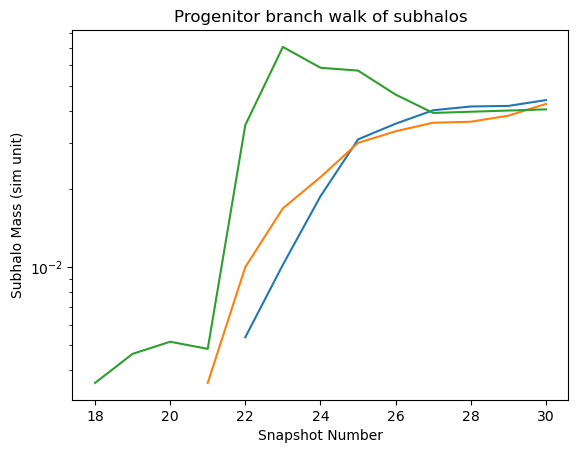

In [83]:
fields = ['Mass','SubfindID','SnapNum']

snapNum=30
GroupFirstSub = il.groupcat.loadHalos(basePath,snapNum,fields=['GroupFirstSub'])
start = 15
for i in range(start,start+3):
    tree = il.sublink.loadTree(basePath,snapNum,GroupFirstSub[i],fields=fields,onlyMPB=True)
    print(tree['SnapNum'])
    plt.plot(tree['SnapNum'],tree['Mass'],'-')
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Subhalo Mass (sim unit)')
plt.title('Progenitor branch walk of subhalos')

In [54]:
fields = ['SubhaloID','SubfindID','SnapNum']
snapNum= 20
subhaloid= 0
tree = il.sublink.loadTree(basePath,snapNum,subhaloid,fields=fields,onlyMPB=True)

12 103 12
postprocessing/tree_extended.0.hdf5
/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/postprocessing/tree_extended.0.hdf5
postprocessing/tree_extended.0.hdf5
/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/postprocessing/tree_extended.0.hdf5
['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloID', 'SubhaloIDRaw', 'TreeID']


In [ ]:
basePath = '/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich/output'

In [19]:
snapNum=0
offsetPath = basePath + '/../postprocessing/offsets/offsets_%03d.hdf5'%snapNum

In [42]:
snapNum=9
offsetPath = basePath + '/postprocessing/offsets/offsets_%03d.hdf5'%snapNum
f =  h5py.File(offsetPath, 'r') 
print(f.keys())
#print(f['FileOffsets'][:])
#print(f['SubhaloID'][:])
print(np.sum(f['SubhaloID'][:]>0))
#print(f['RowNum'][:])
#print(f['LastProgenitorID'][:])

<KeysViewHDF5 ['FileOffsets', 'LastProgenitorID', 'MainLeafProgenitorID', 'RowNum', 'SubhaloID']>
49


In [49]:
snapNum=10
basePath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
offsetPath = basePath + '/../postprocessing/offsets/offsets_%03d.hdf5'%snapNum
f =  h5py.File(offsetPath, 'r') 
print(f.keys())
print(f['FileOffsets'].keys())
print(f['FileOffsets/Subhalo'][:])

<KeysViewHDF5 ['FileOffsets', 'Group', 'Subhalo']>
<KeysViewHDF5 ['Group', 'SnapByType', 'SubLink', 'SubLink_gal', 'Subhalo']>
[      0    6146   20552   33804   46812   59696   72361   84923   97198
  109375  121568  133738  145862  158025  170132  182207  194167  206041
  217975  229873  241724  253740  265719  277566  289329  301157  313043
  324899  336635  348497  360217  371987  383741  395380  407098  418756
  430574  442184  453905  465715  477336  489045  500770  512572  524276
  535912  547569  559181  570821  582433  594072  605720  617436  629124
  640788  652337  663917  675527  687194  698837  710493  722116  733700
  745265  756756  768271  779777  791270  802855  814345  825797  837307
  848928  860414  871907  883387  894800  906181  917715  929270  940795
  952218  963672  975132  986600  998085 1009586 1020947 1032398 1043834
 1055300 1066871 1078442 1089858 1101338 1112882 1124453 1135922 1147431
 1158994 1170398 1181879 1193325 1204851 1216364 1227744 1239260 12507

In [37]:
basePath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'

In [38]:
fields = ['SubhaloMass','SubfindID','SnapNum']
tree = il.sublink.loadTree(basePath,0,0,fields=fields,onlyMPB=True)

In [36]:
snapNum = 0
offsetpath = basePath+'/../postprocessing/offsets/offsets_%03d.hdf5' % snapNum

In [37]:
h5py.File(offsetpath)

<HDF5 file "offsets_000.hdf5" (mode r)>